In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [17]:
gtex_seg_dir = '../Data/seg_idx'
def set_plain_HE_CV_segIdx(df):
    """Adds plain, HE, and CV based SEG indices inplace."""
    
    rho = df.rho.rank(pct=True)
    sigma = df.sigma.rank(ascending=False, pct=True)
    zero = df.zero.rank(ascending=False, pct=True, na_option='bottom')
    mu = df.mu.rank(pct=True) # Include the mean level of expression for HE_segIdx
    cv = (df.sigma/df.mu).rank(ascending=False, pct=True)
    df['segIdx'] = (rho + sigma + zero)/3
    df['HE_segIdx'] = (rho + sigma + zero + mu)/4
    df['CV_segIdx'] = (rho + cv + zero)/3
    df['CV_nozero'] = (rho + cv)/2
gtex_files = sorted([file for file in os.listdir(gtex_seg_dir) if os.path.isfile(os.path.join(gtex_seg_dir, file))])
gtex_tissues = [fn.split('_', 3)[3].rsplit('_', 1)[0].replace('_', ' ') for fn in gtex_files]

gtex_seg_dfs = {}
for fn, tissue in zip(gtex_files, gtex_tissues):
    df = pd.read_feather(os.path.join(gtex_seg_dir, fn))
    set_plain_HE_CV_segIdx(df)
    df.rename(columns={'gene': 'ens'}, inplace=True)
    gtex_seg_dfs[tissue] = df

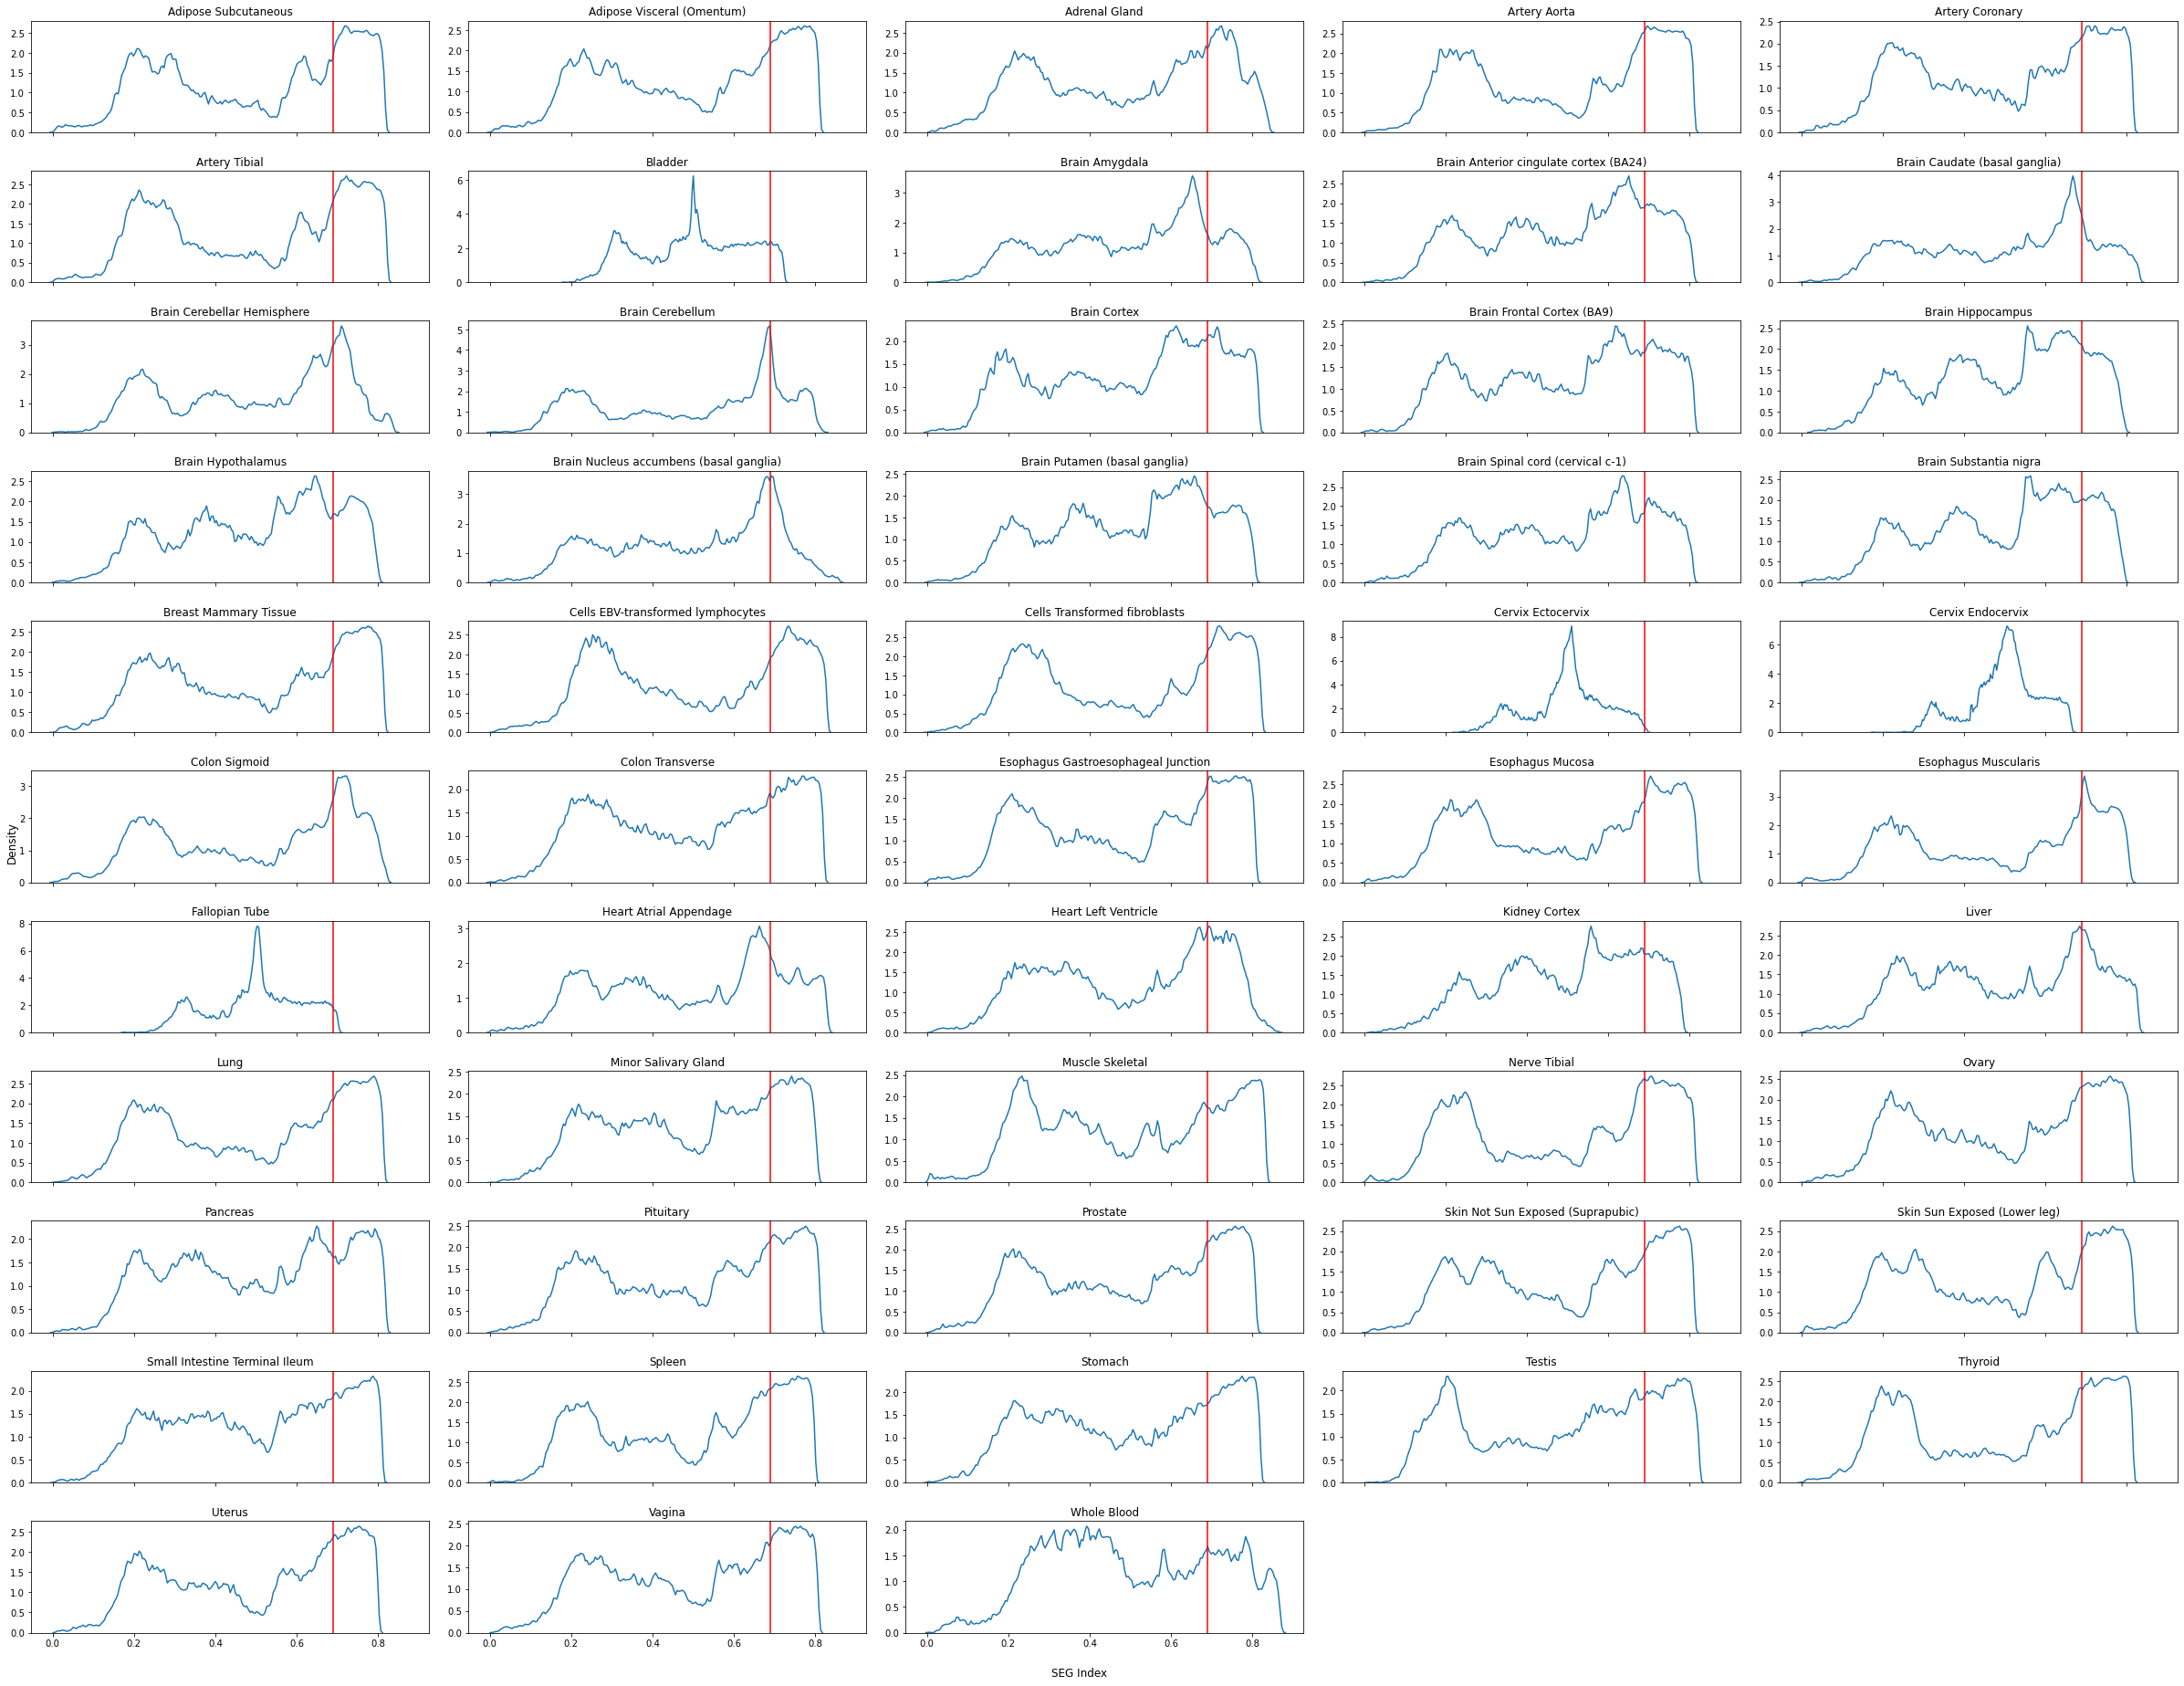

In [19]:
ncol = min(5, len(gtex_tissues))
nrow = -(len(gtex_tissues)//-ncol)
fig, axs = plt.subplots(nrow, ncol, figsize=(3*nrow+1, 5*ncol+1), sharex=True)
for tissue, ax in zip(gtex_tissues, axs.flatten()):
    sns.kdeplot(gtex_seg_dfs[tissue].CV_segIdx, bw_adjust=0.1, ax=ax)
    ax.set(xlabel=None, ylabel=None)
    ax.axvline(0.69, c='red')    
    ax.set(title=tissue)
for ax in axs.flatten()[-2:]:
    ax.axis('off')
fig.supxlabel('SEG Index')
fig.supylabel('Density')
fig.tight_layout(pad=2)